In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

611

In [6]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key


In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)



http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fdb250bebf12d4699055345a38a0d53c
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fdb250bebf12d4699055345a38a0d53c&q=Boston


In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | skogn
Processing Record 2 of Set 1 | bredasdorp
Processing Record 3 of Set 1 | louisbourg
City not found. Skipping...
Processing Record 4 of Set 1 | victoria
Processing Record 5 of Set 1 | ribeira grande
Processing Record 6 of Set 1 | la peca
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | airai
Processing Record 9 of Set 1 | jamestown
Processing Record 10 of Set 1 | pevek
Processing Record 11 of Set 1 | yellowknife
Processing Record 12 of Set 1 | arraial do cabo
Processing Record 13 of Set 1 | bengkulu
Processing Record 14 of Set 1 | iqaluit
Processing Record 15 of Set 1 | san cristobal
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | dunedin
Processing Record 18 of Set 1 | georgetown
Processing Record 19 of Set 1 | calbuco
Processing Record 20 of Set 1 | tessalit
Processing Record 21 of Set 1 | palmer
Processing Record 22 of Set 1 | thompson
Processi

Processing Record 40 of Set 4 | puerto ayora
Processing Record 41 of Set 4 | bridgetown
Processing Record 42 of Set 4 | trinidad
Processing Record 43 of Set 4 | cidreira
Processing Record 44 of Set 4 | torbay
Processing Record 45 of Set 4 | buala
Processing Record 46 of Set 4 | bathsheba
Processing Record 47 of Set 4 | fallon
Processing Record 48 of Set 4 | nikolskoye
Processing Record 49 of Set 4 | shebunino
Processing Record 50 of Set 4 | hvolsvollur
Processing Record 1 of Set 5 | mandan
Processing Record 2 of Set 5 | parkes
Processing Record 3 of Set 5 | kudahuvadhoo
Processing Record 4 of Set 5 | cherskiy
Processing Record 5 of Set 5 | belaya gora
Processing Record 6 of Set 5 | souillac
Processing Record 7 of Set 5 | kroya
Processing Record 8 of Set 5 | cedar city
Processing Record 9 of Set 5 | manga
Processing Record 10 of Set 5 | bairiki
Processing Record 11 of Set 5 | ust-nera
Processing Record 12 of Set 5 | carnarvon
Processing Record 13 of Set 5 | chokurdakh
Processing Record 

Processing Record 32 of Set 8 | denpasar
Processing Record 33 of Set 8 | bognor regis
Processing Record 34 of Set 8 | opuwo
Processing Record 35 of Set 8 | murmashi
Processing Record 36 of Set 8 | yeppoon
Processing Record 37 of Set 8 | vestmannaeyjar
Processing Record 38 of Set 8 | tuatapere
Processing Record 39 of Set 8 | kavaratti
Processing Record 40 of Set 8 | aksu
Processing Record 41 of Set 8 | maceio
Processing Record 42 of Set 8 | miandrivazo
Processing Record 43 of Set 8 | el balyana
City not found. Skipping...
Processing Record 44 of Set 8 | semnan
Processing Record 45 of Set 8 | pangnirtung
Processing Record 46 of Set 8 | ilulissat
Processing Record 47 of Set 8 | floriano
Processing Record 48 of Set 8 | nizhneyansk
City not found. Skipping...
Processing Record 49 of Set 8 | ardakan
Processing Record 50 of Set 8 | beringovskiy
Processing Record 1 of Set 9 | port-gentil
Processing Record 2 of Set 9 | saint-augustin
Processing Record 3 of Set 9 | puro
Processing Record 4 of Se

City not found. Skipping...
Processing Record 16 of Set 12 | marawi
Processing Record 17 of Set 12 | ponca city
Processing Record 18 of Set 12 | vila
Processing Record 19 of Set 12 | ipeti
City not found. Skipping...
Processing Record 20 of Set 12 | amapa
Processing Record 21 of Set 12 | palu
Processing Record 22 of Set 12 | ugento
Processing Record 23 of Set 12 | avera
Processing Record 24 of Set 12 | parambu
Processing Record 25 of Set 12 | waddan
Processing Record 26 of Set 12 | gilbues
Processing Record 27 of Set 12 | tilichiki
Processing Record 28 of Set 12 | tambopata
Processing Record 29 of Set 12 | binghamton
Processing Record 30 of Set 12 | alhaurin el grande
Processing Record 31 of Set 12 | kaili
Processing Record 32 of Set 12 | sao joao da barra
Processing Record 33 of Set 12 | shangzhi
Processing Record 34 of Set 12 | charyshskoye
Processing Record 35 of Set 12 | geraldton
Processing Record 36 of Set 12 | kanniyakumari
Processing Record 37 of Set 12 | ostrovnoy
Processing R

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Skogn,63.7000,11.2000,47.98,80,100,3.04,NO,2021-09-16 01:37:14
1,Bredasdorp,-34.5322,20.0403,47.52,93,70,2.30,ZA,2021-09-16 01:36:34
2,Victoria,22.2855,114.1577,88.32,80,99,7.90,HK,2021-09-16 01:36:48
3,Ribeira Grande,38.5167,-28.7000,71.29,77,8,6.67,PT,2021-09-16 01:37:14
4,La Peca,-5.6111,-78.4350,68.67,81,22,4.18,PE,2021-09-16 01:37:14
5,Mataura,-46.1927,168.8643,48.47,78,99,3.27,NZ,2021-09-16 01:37:15
6,Airai,-8.9266,125.4092,76.37,44,56,5.37,TL,2021-09-16 01:37:15
7,Jamestown,42.0970,-79.2353,60.44,91,1,2.35,US,2021-09-16 01:37:15
8,Pevek,69.7008,170.3133,31.23,70,100,12.35,RU,2021-09-16 01:37:15
9,Yellowknife,62.4560,-114.3525,46.92,71,75,18.41,CA,2021-09-16 01:36:30


In [10]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Skogn,NO,2021-09-16 01:37:14,63.7000,11.2000,47.98,80,100,3.04
1,Bredasdorp,ZA,2021-09-16 01:36:34,-34.5322,20.0403,47.52,93,70,2.30
2,Victoria,HK,2021-09-16 01:36:48,22.2855,114.1577,88.32,80,99,7.90
3,Ribeira Grande,PT,2021-09-16 01:37:14,38.5167,-28.7000,71.29,77,8,6.67
4,La Peca,PE,2021-09-16 01:37:14,-5.6111,-78.4350,68.67,81,22,4.18
...,...,...,...,...,...,...,...,...,...
561,Evensk,RU,2021-09-16 01:39:13,61.9500,159.2333,51.13,61,98,9.04
562,Matara,LK,2021-09-16 01:39:13,5.9485,80.5353,80.62,82,42,9.57
563,Yaan,NG,2021-09-16 01:39:14,7.3833,8.5667,73.60,96,99,5.48
564,Palembang,ID,2021-09-16 01:39:14,-2.9167,104.7458,77.09,88,20,4.61


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [13]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1631756354.5254624

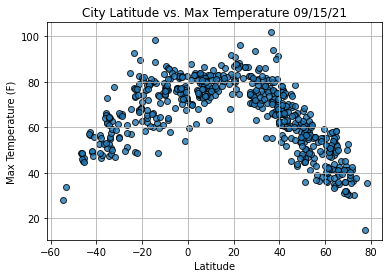

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

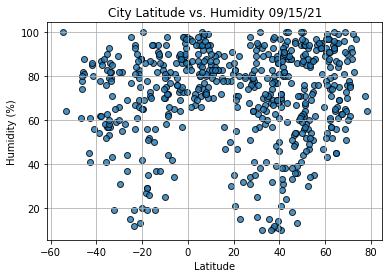

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

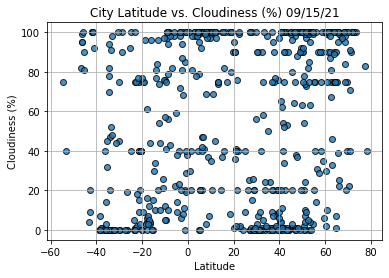

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

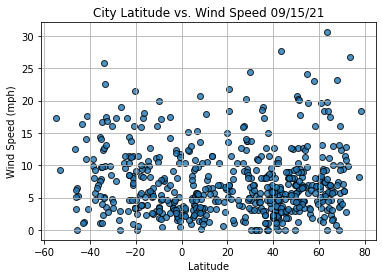

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
# Import linregress
from scipy.stats import linregress


# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [19]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

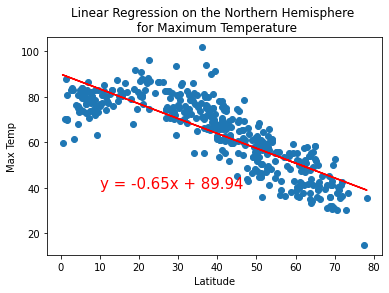

In [20]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature',
                        'Max Temp',(10,40))

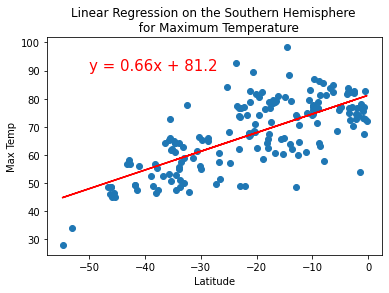

In [21]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n  for Maximum Temperature',
                       'Max Temp',(-50,90))

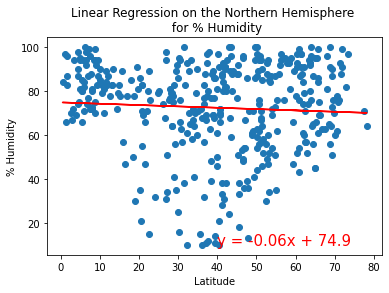

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity',
                         '% Humidity',(40,10))

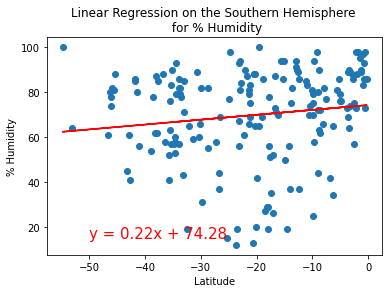

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity',
                       '% Humidity',(-50,15))

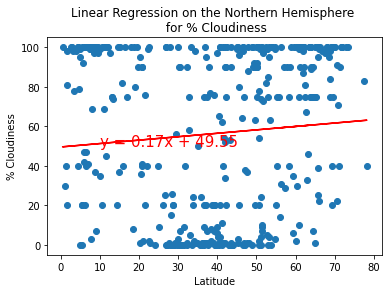

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness',
                       '% Cloudiness',(10,50))

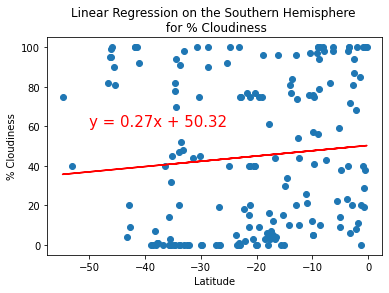

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness',
                        '% Cloudiness',(-50,60))

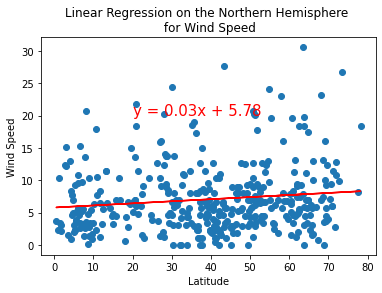

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed',
                        'Wind Speed',(20,20))

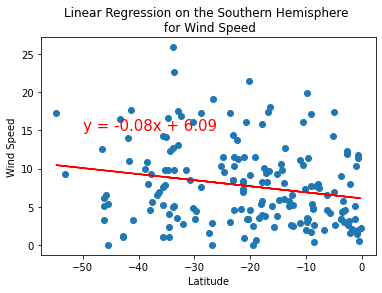

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed',
                         'Wind Speed',(-50,15))